# Redes aleatorias y redes reales

Como habrán podido ver en el final de la [Práctica 4](../practica_04/sesion_practica_04_notebook.ipynb), en general las redes aleatorias no son un buen modelo para describir las redes reales. Su importancia en el estudio de redes, en este curso, radica en que son un primer modelo al cual aplicar las propiedades matemáticas desarrolladas en la primera parte del curso, además de iniciar con ese modelo el ejercicio de contrastar las predicciones de un modelo con las características empíricas de las redes reales.

Particularmente vieron cómo el modelo aleatorio falla al predecir el clustering promedio, el clustering de los nodos y la distribución de grado de las redes reales. Aquí mostramos el ejemplo de una red metabólica para la especie _C. Elegans_ de acuerdo a como se hizo en la sección _Comparación del modelo de red aleatoria con redes reales_ de la Práctica 4. En este ejemplo se pueden ver claramente las discrepancias con la red aleatoria correspondiente.

## Coeficiente de clustering promedio

In [98]:
import pandas as pd

ruta = '/home/carlos/Documentos/bio-CE-CX.edges'

datos = pd.read_csv(ruta,
            #nrows = 10,
            skiprows = 0,
            header = None,
            sep = ' ',
            usecols = [0,1])

G = nx.from_pandas_edgelist(datos, source = 0, target = 1)

####################################################

N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)

p = k / (N-1)
print('Propiedades generales de tu red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)
print('\nEl coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:\n', p)

Propiedades generales de tu red:
- El número de nodos es:	 15229
- El número de enlaces es:	 245952
- El grado promedio es:		 32.300479348611205


El coeficiente de clustering promedio de la red es:
 0.21116502730743858

El coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:
 0.0021211242020364595


## Distribución de grado


Text(0.5,0,'k')

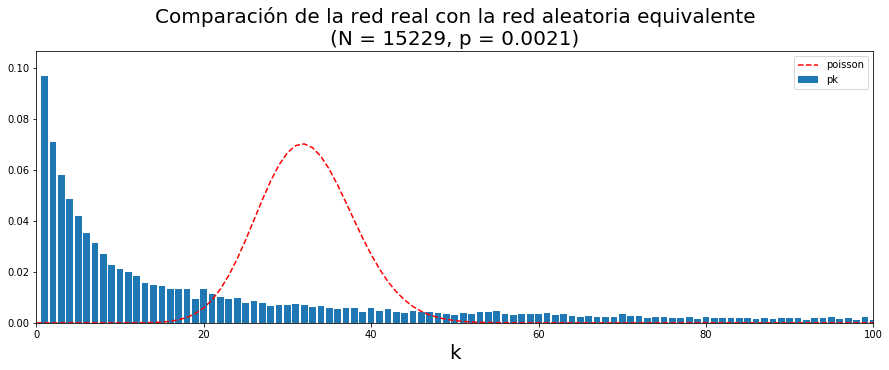

In [104]:
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)

df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']

K = df.Degree.max()

y,x = np.histogram(df.Degree.values, bins = range(int(K)+1), density= True)

plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 

plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,100])
plt.legend()
plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)

Text(0.5,0,'k')

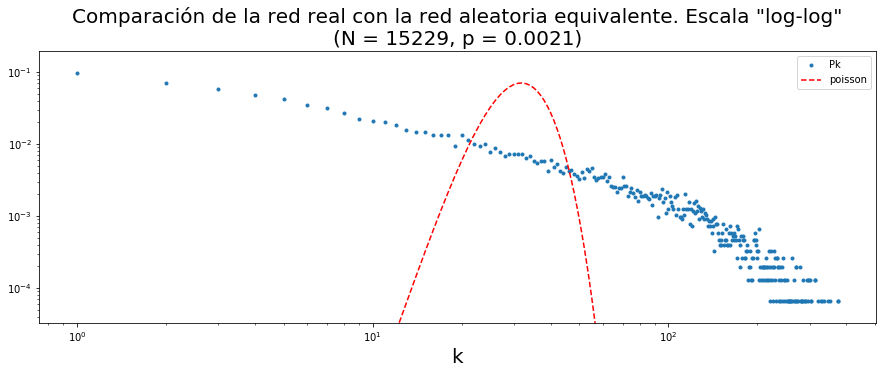

In [105]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.', label = 'Pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

plt.xscale('log')
plt.yscale('log')

plt.ylim([0.5*y[y>0].min(),2*y.max()])
plt.legend()

plt.title('Comparación de la red real con la red aleatoria equivalente. Escala "log-log"\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)

## Clustering de los nodos

### Representación 1

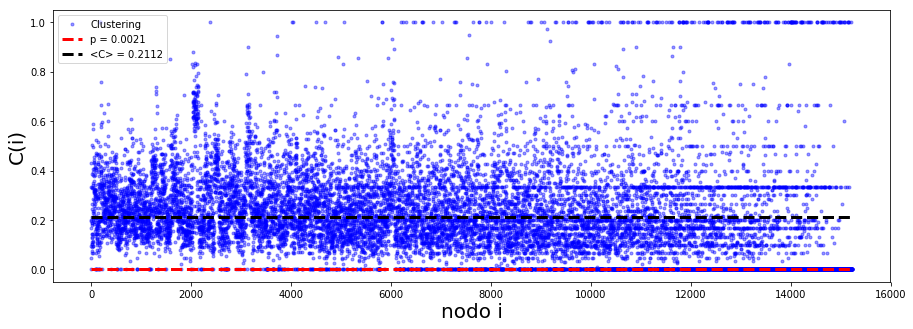

In [106]:
plt.figure(figsize = [15,5])
df.Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.legend()

### Representación 2

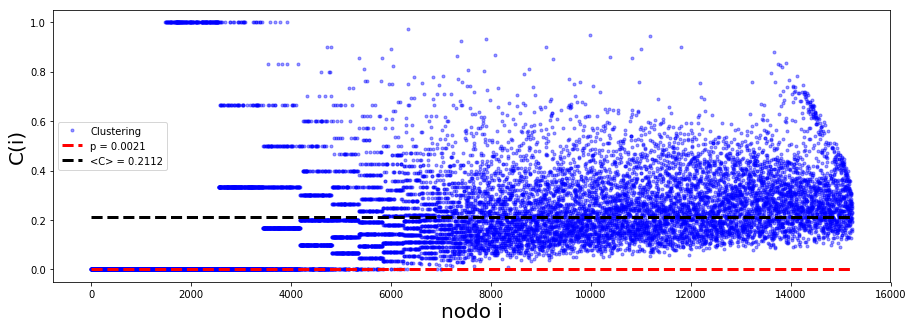

In [107]:
plt.figure(figsize = [15,5])
df.sort_values('Degree').reset_index().Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.legend()

### Representación 3

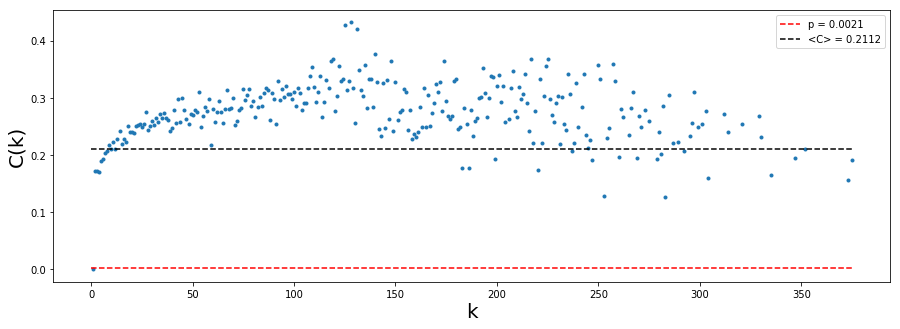

In [109]:
X, Y = df.groupby('Degree')['Clustering'].mean().reset_index().values.T

plt.figure(figsize=[15,5])
plt.plot(X, Y, '.')

plt.plot([0,K], [p,p], 'r--', label = 'p = %.4f' %p)
plt.plot([0,K], [C,C], 'k--', label = '<C> = %.4f' %C)

plt.xlabel('k', size = 20)
plt.ylabel('C(k)', size = 20)
plt.legend()